# Linear Regression From Scratch – Week 3



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Salary_Data.csv'

In [3]:
df = pd.read_csv("Salary_Data.csv")
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
print(df.shape)


(30, 3)


In [5]:
X = df["YearsExperience"]
y = df["Salary"]


In [6]:
X = X.values
y = y.values


In [7]:
print(type(X))
print(type(y))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
w = 0
b = 0

learning_rate = 0.01
epochs = 1000
n = len(X)


In [9]:
def predict(X, w, b):
    return w * X + b


In [10]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [11]:
losses = []

for epoch in range(epochs):
    y_pred = predict(X, w, b)

    loss = mse(y, y_pred)
    losses.append(loss)

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w = w - learning_rate * dw
    b = b - learning_rate * db


In [12]:
print("Final w:", w)
print("Final b:", b)
print("Final loss:", losses[-1])


Final w: 9504.801321957242
Final b: 24474.557566113308
Final loss: 31300502.429962


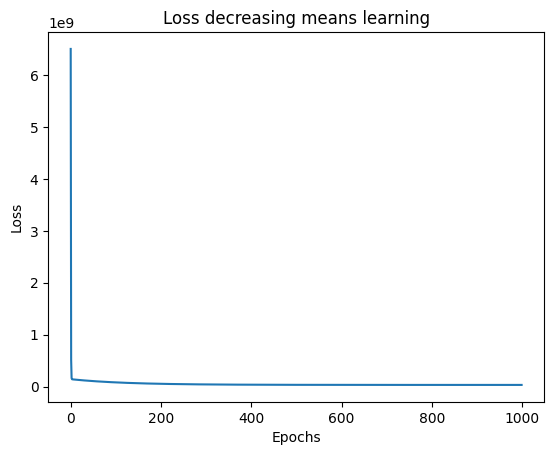

In [13]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss decreasing means learning")
plt.show()


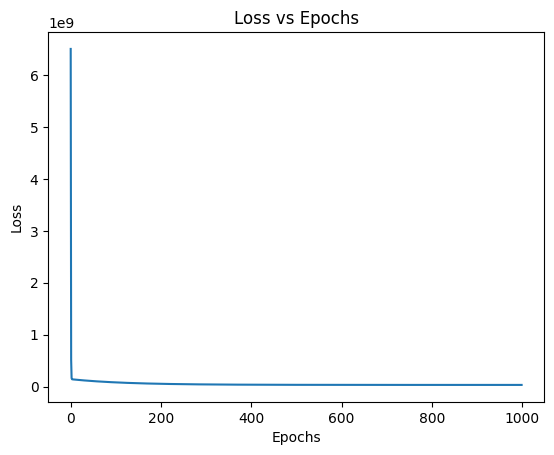

In [14]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


In [15]:
def train_model(lr):
    w, b = 0, 0
    losses = []

    for _ in range(epochs):
        y_pred = w * X + b
        loss = np.mean((y - y_pred) ** 2)
        losses.append(loss)

        dw = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        w -= lr * dw
        b -= lr * db

    return losses


In [16]:
loss_lr_01 = train_model(0.1)
loss_lr_001 = train_model(0.01)
loss_lr_0001 = train_model(0.001)


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\hp\AppData\Local\Temp\ipykernel_18224\2095520347.py:7: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - y_pred) ** 2)
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_18224\2095520347.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  w -= lr * dw


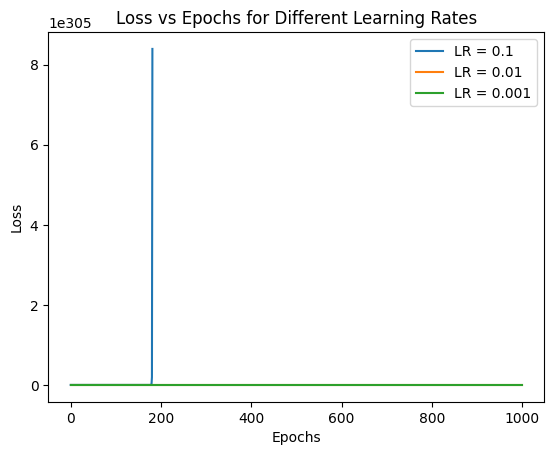

In [17]:
plt.plot(loss_lr_01, label="LR = 0.1")
plt.plot(loss_lr_001, label="LR = 0.01")
plt.plot(loss_lr_0001, label="LR = 0.001")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Learning Rates")
plt.legend()
plt.show()


TASK 5: COMPARISON WITH SKLEARN 

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
X_sklearn = X.reshape(-1, 1)


In [20]:
model = LinearRegression()
model.fit(X_sklearn, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
print("Sklearn coefficient (w):", model.coef_[0])
print("Sklearn intercept (b):", model.intercept_)


Sklearn coefficient (w): 9449.962321455074
Sklearn intercept (b): 24848.203966523208
